In [1]:
#imports all needed modules 
import NotebookFinder
import data_cleaner as dclean
import gene_selection as gs
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

importing Jupyter notebook from data_cleaner.ipynb
importing data_cleaner modules...
done
importing Jupyter notebook from gene_selection.ipynb


In [2]:
data = dclean.clean_GSE_series_matrix('GSE63990_series_matrix.txt')


reading file...
Dropping Series_title
Dropping Series_geo_accession
Dropping Series_status
Dropping Series_submission_date
Dropping Series_last_update_date
Dropping Series_pubmed_id
Dropping Series_summary
Dropping Series_overall_design
Dropping Series_type
Dropping Series_contributor
Dropping Series_sample_id
Dropping Series_contact_name
Dropping Series_contact_email
Dropping Series_contact_department
Dropping Series_contact_institute
Dropping Series_contact_address
Dropping Series_contact_city
Dropping Series_contact_state
Dropping Series_contact_zip/postal_code
Dropping Series_contact_country
Dropping Series_supplementary_file
Dropping Series_platform_id
Dropping Series_platform_taxid
Dropping Series_sample_taxid
Dropping Series_relation
Converting Sample_characteristics_ch1


In [4]:
def find_XY(data):
    #convert characteristics into numbers for training

    #define dictionary
    infection = {'non-infectious illness': 1, 'bacterial': 2, 'viral': 3}
    #create numpy array 
    characteristics = np.array([infection[item] for item in data.Sample_characteristics_ch1], dtype=float)
    
    #returns list of keys in data which represent genes (with their affymetrix genechip scanner names)
    genes = [gene for gene in data.keys() if not('Sample' in gene or 'ID_REF' in gene)]
           
    #take only dict entries related to those keys
    expression = np.array(data[genes], dtype=float)
    expression = np.array([gene for gene in expression if any([i in str(gene) for i in '0123456789'])], dtype=float)

    
    return expression, characteristics

In [3]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


/home/ray/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


                           Gene      Score
22239  AFFX-HUMRGE/M10098_5_at"  62.413376
6852                 207329_at"  51.908816
21443              222084_s_at"  45.796933
12152              212768_s_at"  45.511495
10952              211548_s_at"  39.885743
3439               203913_s_at"  39.213689
19338              219975_x_at"  38.786768
9477                 209992_at"  36.792002
5370                 205844_at"  36.757702
5702               206177_s_at"  35.538623
19032                219669_at"  35.401498
3440               203914_x_at"  35.133532
8786               209293_x_at"  34.937390
22240  AFFX-HUMRGE/M10098_M_at"  34.897467
16040              216671_x_at"  31.861675
9445                 209960_at"  28.876673
16806                217442_at"  28.460255
2680                 203153_at"  27.864647
5975                 206450_at"  27.230384
22245         AFFX-M27830_5_at"  26.992943
Computing t-SNE embedding


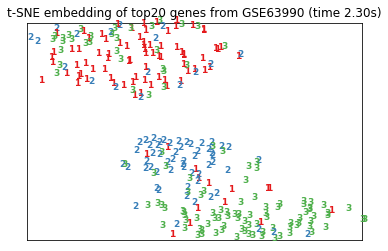

In [26]:
X,y = gs.select(data, 20, split = False)
y=np.array([np.where(r==1)[0][0] for r in y])
y+=1
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of top20 genes from GSE63990 (time %.2fs)" %
               (time() - t0))


Computing t-SNE embedding


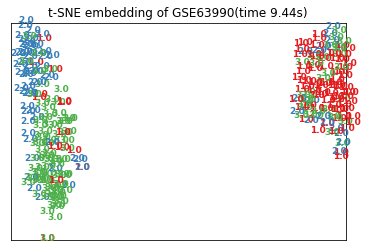

In [20]:
X,y = find_XY(data)
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of GSE63990 (time %.2fs)" %
               (time() - t0))
